# Introdução Análise de Texto

## Módulos

- Instalações

In [1]:
! sudo pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 2.5 MB/s eta 0:00:00


- Carregamento

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image

In [3]:
import re
from unicodedata import normalize
import unidecode
import string

In [4]:
from spacy.lang.pt.stop_words import STOP_WORDS

In [5]:
STOP_WORDS

{'a',
 'acerca',
 'ademais',
 'adeus',
 'agora',
 'ainda',
 'algo',
 'algumas',
 'alguns',
 'ali',
 'além',
 'ambas',
 'ambos',
 'antes',
 'ao',
 'aos',
 'apenas',
 'apoia',
 'apoio',
 'apontar',
 'após',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aqui',
 'aquilo',
 'as',
 'assim',
 'através',
 'atrás',
 'até',
 'aí',
 'baixo',
 'bastante',
 'bem',
 'boa',
 'bom',
 'breve',
 'cada',
 'caminho',
 'catorze',
 'cedo',
 'cento',
 'certamente',
 'certeza',
 'cima',
 'cinco',
 'coisa',
 'com',
 'como',
 'comprida',
 'comprido',
 'conhecida',
 'conhecido',
 'conselho',
 'contra',
 'contudo',
 'corrente',
 'cuja',
 'cujo',
 'custa',
 'cá',
 'da',
 'daquela',
 'daquele',
 'dar',
 'das',
 'de',
 'debaixo',
 'demais',
 'dentro',
 'depois',
 'des',
 'desde',
 'dessa',
 'desse',
 'desta',
 'deste',
 'deve',
 'devem',
 'deverá',
 'dez',
 'dezanove',
 'dezasseis',
 'dezassete',
 'dezoito',
 'diante',
 'direita',
 'disso',
 'diz',
 'dizem',
 'dizer',
 'do',
 'dois',
 'dos',
 'doze',
 'duas',
 'dá

## Carregar dados

In [7]:
dados_cptm = pd.read_csv('dados_cptm.csv', encoding = 'latin1')

In [8]:
dados_cptm

,created,id,texto_do_twitter,screenName,polaridade,data_ajustada
0,2017-02-28T18:20:24Z,836687521182547968,@CPTM_oficial 20 min q estou esperando um trem...,_richardbatista,-1,2017-02-28
1,2017-02-28T18:20:13Z,836687476483731456,[18h20] CPTM: Linha 11 - Coral: Velocidade Red...,transitoagoraSP,-1,2017-02-28
2,2017-02-28T18:20:13Z,836687475984613376,[18h20] CPTM: Linha 9 - Esmeralda: Operação No...,transitoagoraSP,1,2017-02-28
3,2017-02-28T18:20:13Z,836687475468713984,[18h20] CPTM: Linha 7 - Rubi: Velocidade Reduz...,transitoagoraSP,-1,2017-02-28
4,2017-02-28T18:09:15Z,836684713209257984,@_lcoliveira2016 @UsuariosMetroSP @CPTM_oficia...,Lik001,-1,2017-02-28
...,...,...,...,...,...,...
8465,2017-02-17T09:59:28Z,832575188168372224,[10h59] CPTM: Linha 9 - Esmeralda: Operação No...,transitoagoraSP,1,2017-02-17
8466,2017-02-17T09:59:27Z,832575187589615616,[10h59] CPTM: Linha 7 - Rubi: Velocidade Reduz...,transitoagoraSP,-1,2017-02-17
8467,2017-02-17T09:39:26Z,832570147516747776,[10h39] CPTM: Linha 11 - Coral: Operação Norma...,transitoagoraSP,1,2017-02-17
8468,2017-02-17T09:32:42Z,832568453659840513,Ao embarcar ou desembarcar na CPTM tenha muito...,UsuariosMetroSP,0,2017-02-17


In [9]:
dados_cptm.dtypes

created             object
id                   int64
texto_do_twitter    object
screenName          object
polaridade           int64
data_ajustada       object
dtype: object

## Pré-processamento

### Funções importantes

In [10]:
# retirar url's
url_re = re.compile('https?://(www.)?\w+\.\w+(/\w+)*/?')

In [11]:
# pontuacao
punc_re = re.compile('[%s]' % re.escape(string.punctuation))

In [12]:
# numeros
num_re = re.compile('(\\d+)')

In [13]:
# alfa numericos
alpha_num_re = re.compile("^[a-z0-9_.]+$")

In [14]:
# mencoes
mention_re = re.compile('@(\w+)')

### Ajustes

- Deixar minúsculo

In [16]:
#Padronizar o texto em maiusculo ou minusculo
texto_ajustado = dados_cptm['texto_do_twitter'].apply(lambda x: x.lower())
texto_ajustado

0       @cptm_oficial 20 min q estou esperando um trem...
1       [18h20] cptm: linha 11 - coral: velocidade red...
2       [18h20] cptm: linha 9 - esmeralda: operação no...
3       [18h20] cptm: linha 7 - rubi: velocidade reduz...
4       @_lcoliveira2016 @usuariosmetrosp @cptm_oficia...
                              ...                        
8465    [10h59] cptm: linha 9 - esmeralda: operação no...
8466    [10h59] cptm: linha 7 - rubi: velocidade reduz...
8467    [10h39] cptm: linha 11 - coral: operação norma...
8468    ao embarcar ou desembarcar na cptm tenha muito...
8469    [09h39] cptm: linha 9 - esmeralda: operação no...
Name: texto_do_twitter, Length: 8470, dtype: object

- Limpar url's

In [19]:
#Achar http, cointains serve para acahr linhas dentro de um comando
texto_ajustado[texto_ajustado.str.contains('http')]

9       18h - obras alteram circulação dos trens duran...
10      18h - obras alteram circulação dos trens duran...
11      18h - obras alteram circulação dos trens duran...
12      18h - obras alteram circulação dos trens duran...
13      18h - obras alteram circulação dos trens duran...
                              ...                        
8447    problemas nas linhas de trens e metro. saiba c...
8454    rt @cptm_oficial: #dicacultural olhares sobre ...
8457    #dicacultural olhares sobre os trilhos\n\n#vej...
8463    vontadinha de bater cabelo na cptm https://t.c...
8468    ao embarcar ou desembarcar na cptm tenha muito...
Name: texto_do_twitter, Length: 2781, dtype: object

In [20]:
#Ajuste de achar todas as linhas e retirar url e colocar um espaço vazio ali, identificando o padrão da URL
texto_ajustado[texto_ajustado.str.contains('http')].apply(lambda x: url_re.sub(' ', x))

9       18h - obras alteram circulação dos trens duran...
10      18h - obras alteram circulação dos trens duran...
11      18h - obras alteram circulação dos trens duran...
12      18h - obras alteram circulação dos trens duran...
13      18h - obras alteram circulação dos trens duran...
                              ...                        
8447    problemas nas linhas de trens e metro. saiba c...
8454    rt @cptm_oficial: #dicacultural olhares sobre ...
8457    #dicacultural olhares sobre os trilhos\n\n#vej...
8463                 vontadinha de bater cabelo na cptm  
8468    ao embarcar ou desembarcar na cptm tenha muito...
Name: texto_do_twitter, Length: 2781, dtype: object

In [21]:
#Pegando texto inteiro e passando a função
texto_ajustado = texto_ajustado.apply(lambda x: url_re.sub(' ', x))

- Ajustar menções com @

In [22]:
#Tudo que tiver @ podemos tirar, tudo que é padrão de menção
texto_ajustado = texto_ajustado.apply(lambda x: mention_re.sub(' ', x))
texto_ajustado

0         20 min q estou esperando um trem pra luz na ...
1       [18h20] cptm: linha 11 - coral: velocidade red...
2       [18h20] cptm: linha 9 - esmeralda: operação no...
3       [18h20] cptm: linha 7 - rubi: velocidade reduz...
4             durante a semana eles ñ reprimem o comér...
                              ...                        
8465    [10h59] cptm: linha 9 - esmeralda: operação no...
8466    [10h59] cptm: linha 7 - rubi: velocidade reduz...
8467    [10h39] cptm: linha 11 - coral: operação norma...
8468    ao embarcar ou desembarcar na cptm tenha muito...
8469    [09h39] cptm: linha 9 - esmeralda: operação no...
Name: texto_do_twitter, Length: 8470, dtype: object

- Ajustar pontuações (*punctuations marks*)

In [24]:
#Punc vai tirar algumas pontuações
texto_ajustado = texto_ajustado.apply(lambda x: punc_re.sub(' ', x))
texto_ajustado

0         20 min q estou esperando um trem pra luz na ...
1        18h20  cptm  linha 11   coral  velocidade red...
2        18h20  cptm  linha 9   esmeralda  operação no...
3        18h20  cptm  linha 7   rubi  velocidade reduz...
4             durante a semana eles ñ reprimem o comér...
                              ...                        
8465     10h59  cptm  linha 9   esmeralda  operação no...
8466     10h59  cptm  linha 7   rubi  velocidade reduz...
8467     10h39  cptm  linha 11   coral  operação norma...
8468    ao embarcar ou desembarcar na cptm tenha muito...
8469     09h39  cptm  linha 9   esmeralda  operação no...
Name: texto_do_twitter, Length: 8470, dtype: object

- Limpar numeração

In [25]:
#Podemos limpar a numeração, achando tudo que é caracter numérico
texto_ajustado = texto_ajustado.apply(lambda x: num_re.sub(' ', x))
texto_ajustado

0           min q estou esperando um trem pra luz na b...
1         h   cptm  linha     coral  velocidade reduzi...
2         h   cptm  linha     esmeralda  operação norm...
3         h   cptm  linha     rubi  velocidade reduzid...
4             durante a semana eles ñ reprimem o comér...
                              ...                        
8465      h   cptm  linha     esmeralda  operação norm...
8466      h   cptm  linha     rubi  velocidade reduzid...
8467      h   cptm  linha     coral  operação normal  ...
8468    ao embarcar ou desembarcar na cptm tenha muito...
8469      h   cptm  linha     esmeralda  operação norm...
Name: texto_do_twitter, Length: 8470, dtype: object

- Ajustar acentos

In [26]:
#Limpando os acentos, normalize, ele vai normalizar aquele texto inteiro e buscar dentro da tabela ASCII o a com acento e o a sem acento
texto_ajustado = texto_ajustado.apply(lambda x: normalize('NFKD', x).encode('ASCII', 'ignore').decode('ASCII'))
texto_ajustado

0           min q estou esperando um trem pra luz na b...
1         h   cptm  linha     coral  velocidade reduzi...
2         h   cptm  linha     esmeralda  operacao norm...
3         h   cptm  linha     rubi  velocidade reduzid...
4             durante a semana eles n reprimem o comer...
                              ...                        
8465      h   cptm  linha     esmeralda  operacao norm...
8466      h   cptm  linha     rubi  velocidade reduzid...
8467      h   cptm  linha     coral  operacao normal  ...
8468    ao embarcar ou desembarcar na cptm tenha muito...
8469      h   cptm  linha     esmeralda  operacao norm...
Name: texto_do_twitter, Length: 8470, dtype: object

- Limpar textos alfa numericos e palavras menores que 3 caracteres

In [27]:
def preprocessamento_texto(texto, n):
  '''Ajustar caracteres alfa numéricos e palavras menores que n
     texto: texto a ser ajustado
     n: tamanho mínimo das palavras'''
  list_pos = 0
  cleaned_str = ''
  for word in texto.split():
      if list_pos == 0:
          if alpha_num_re.match(word) and len(word) > n:
              cleaned_str = word
          else:
              cleaned_str = ' '
      else:
          if alpha_num_re.match(word) and len(word) > n:
              cleaned_str = cleaned_str + ' ' + word
          else:
              cleaned_str += ' '
      list_pos += 1
  return cleaned_str

In [28]:
texto_ajustado = texto_ajustado.apply(lambda x: preprocessamento_texto(x, 3))
texto_ajustado

0                estou esperando  trem      nada  absurdo
1         cptm linha coral velocidade reduzida linha s...
2         cptm linha esmeralda operacao normal linha t...
3         cptm linha rubi velocidade reduzida linha di...
4       durante  semana eles  reprimem  comercio irreg...
                              ...                        
8465      cptm linha esmeralda operacao normal linha t...
8466      cptm linha rubi velocidade reduzida linha di...
8467      cptm linha coral operacao normal linha safir...
8468      embarcar  desembarcar  cptm tenha muito cuid...
8469      cptm linha esmeralda operacao normal linha t...
Name: texto_do_twitter, Length: 8470, dtype: object

- Ajustar palavras muito usadas (*stopwords*)

In [29]:
def remove_stops(texto):
    # expects a string
    stops = set(STOP_WORDS)
    list_pos = 0
    cleaned_str = ''
    text = texto.split()
    for word in text:
        if word not in stops:
            # rebuild cleaned_str
            if list_pos == 0:
                cleaned_str = word
            else:
                cleaned_str = cleaned_str + ' ' + word
            list_pos += 1
    return cleaned_str

In [30]:
list(STOP_WORDS)[0:15]

['teus',
 'nível',
 'tais',
 'usar',
 'pouca',
 'outra',
 'possivelmente',
 'sétima',
 'pois',
 'aos',
 'devem',
 'grande',
 'sem',
 'estivestes',
 'contra']

In [31]:
#STOP_WORDS.update({'cptm'})

In [32]:
texto_ajustado = texto_ajustado.apply(lambda x: remove_stops(x))
texto_ajustado

0                                  esperando trem absurdo
1       cptm linha coral velocidade reduzida linha saf...
2       cptm linha esmeralda operacao normal linha tur...
3       cptm linha rubi velocidade reduzida linha diam...
4       durante semana reprimem comercio irregular que...
                              ...                        
8465    cptm linha esmeralda operacao normal linha tur...
8466    cptm linha rubi velocidade reduzida linha diam...
8467    cptm linha coral operacao normal linha safira ...
8468    embarcar desembarcar cptm tenha cuidado altura...
8469    cptm linha esmeralda operacao normal linha tur...
Name: texto_do_twitter, Length: 8470, dtype: object

- Gravar as mudanças no dataframe

In [33]:
dados_cptm['texto_twitter_ajustado'] = texto_ajustado

In [34]:
dados_cptm

,created,id,texto_do_twitter,screenName,polaridade,data_ajustada,texto_twitter_ajustado
0,2017-02-28T18:20:24Z,836687521182547968,@CPTM_oficial 20 min q estou esperando um trem...,_richardbatista,-1,2017-02-28,esperando trem absurdo
1,2017-02-28T18:20:13Z,836687476483731456,[18h20] CPTM: Linha 11 - Coral: Velocidade Red...,transitoagoraSP,-1,2017-02-28,cptm linha coral velocidade reduzida linha saf...
2,2017-02-28T18:20:13Z,836687475984613376,[18h20] CPTM: Linha 9 - Esmeralda: Operação No...,transitoagoraSP,1,2017-02-28,cptm linha esmeralda operacao normal linha tur...
3,2017-02-28T18:20:13Z,836687475468713984,[18h20] CPTM: Linha 7 - Rubi: Velocidade Reduz...,transitoagoraSP,-1,2017-02-28,cptm linha rubi velocidade reduzida linha diam...
4,2017-02-28T18:09:15Z,836684713209257984,@_lcoliveira2016 @UsuariosMetroSP @CPTM_oficia...,Lik001,-1,2017-02-28,durante semana reprimem comercio irregular que...
...,...,...,...,...,...,...,...
8465,2017-02-17T09:59:28Z,832575188168372224,[10h59] CPTM: Linha 9 - Esmeralda: Operação No...,transitoagoraSP,1,2017-02-17,cptm linha esmeralda operacao normal linha tur...
8466,2017-02-17T09:59:27Z,832575187589615616,[10h59] CPTM: Linha 7 - Rubi: Velocidade Reduz...,transitoagoraSP,-1,2017-02-17,cptm linha rubi velocidade reduzida linha diam...
8467,2017-02-17T09:39:26Z,832570147516747776,[10h39] CPTM: Linha 11 - Coral: Operação Norma...,transitoagoraSP,1,2017-02-17,cptm linha coral operacao normal linha safira ...
8468,2017-02-17T09:32:42Z,832568453659840513,Ao embarcar ou desembarcar na CPTM tenha muito...,UsuariosMetroSP,0,2017-02-17,embarcar desembarcar cptm tenha cuidado altura...


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(dados_cptm, *['id'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(dados_cptm, *['polaridade'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(dados_cptm, *['id'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(dados_cptm, *['polaridade'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(dados_cptm, *[[['id', 'polaridade']]], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(dados_cptm, *['id'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(dados_cptm, *['polaridade'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(dados_cptm, *['id'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(dados_cptm, *['polaridade'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(dados_cptm, *[[['id', 'polaridade']]], **{})
chart

## Nuvem de palavras

Fonte: https://amueller.github.io/word_cloud/index.html

In [35]:
# combinar as linhas em texto inteiro
texto_completo = " ".join(s for s in dados_cptm['texto_twitter_ajustado'])
texto_completo

'esperando trem absurdo cptm linha coral velocidade reduzida linha safira velocidade reduzida transitosp cptm linha esmeralda operacao normal linha turquesa operacao normal transitosp cptm linha rubi velocidade reduzida linha diamante velocidade reduzida transitosp durante semana reprimem comercio irregular queria fizessem feriado cptm nota cptm linha coral velocidade reduzida linha safira velocidade reduzida transitosp cptm linha esmeralda operacao normal linha turquesa operacao normal transitosp cptm linha rubi velocidade reduzida linha diamante velocidade reduzida transitosp obras alteram circulacao trens durante carnaval infos cptm obras alteram circulacao trens durante carnaval infos cptm obras alteram circulacao trens durante carnaval infos cptm obras alteram circulacao trens durante carnaval infos cptm obras alteram circulacao trens durante carnaval infos cptm obras alteram circulacao trens durante carnaval infos cptm obras alteram circulacao trens durante carnaval infos cptm no

- Nuvem simples

In [36]:
wc = WordCloud()
#wc = WordCloud(max_font_size=40, background_color='white')
wc.generate(texto_completo)

(-0.5, 399.5, 199.5, -0.5)

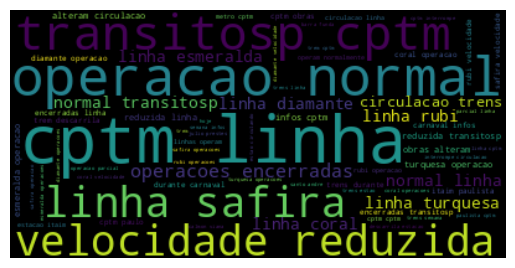

In [38]:
plt.figure()
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
#plot_path = 'cptm_wordcloud.png'
#plt.savefig(plot_path,  bbox_inches='tight', dpi = 100)

- Nuvem com formato

In [39]:
trem_formato = np.array(Image.open('trem.png'))

(-0.5, 715.5, 361.5, -0.5)

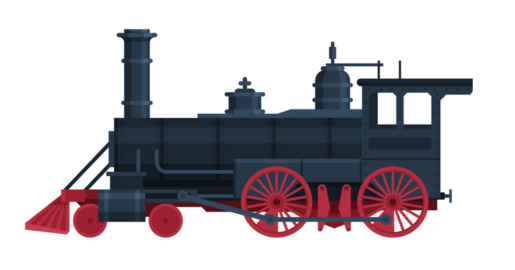

In [40]:
plt.figure()
plt.imshow(trem_formato, interpolation='bilinear')
plt.axis("off")

In [45]:
wc = WordCloud(background_color='blue', mask=trem_formato)

In [47]:
wc.generate(texto_completo)

In [48]:
wc.to_file("trem.png")

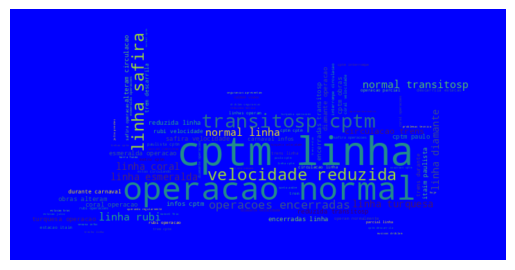

In [49]:
plt.figure()
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plot_path = 'trem_cptm_wordcloud.png'
plt.savefig(plot_path,  bbox_inches='tight', dpi = 300)